### 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

In [2]:
data=pd.read_csv('sales_add.csv')

In [3]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [6]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [7]:
data.shape

(22, 5)

  Ho: There is no increase in sales after stepping into digital marketing.
  Ha: There is an increase in sales after stepping into digital marketing.
Here i used a paired t test to check hypothesis. A paired t test is used to determine if there is a significant difference between the means of two dependent samples. here sales before digital and after digital are testing, so its a dependent sample. 

In [8]:
t_test,pvalue=ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

In [9]:
pvalue

6.336667004575778e-11

In [10]:
if pvalue<0.05:
    print('null hypothesis rejected')
else:
    print('null hypothesis accepted')

null hypothesis rejected


null hypothesis rejected means there is an increase in sales after stepping into digital marketing(alternative hypothesis accepted).

next i just verify that there is an incraese in  sales after stepping into digital marketing by using a line plot.

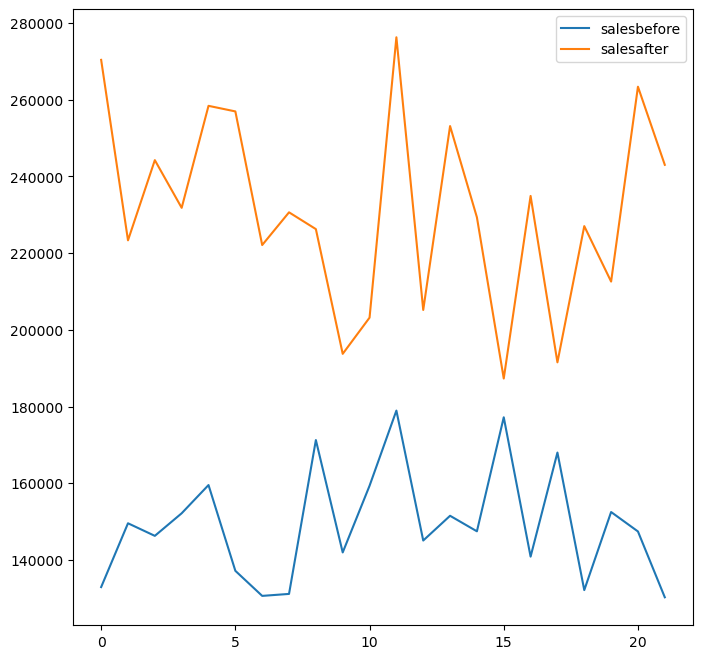

In [11]:
plt.figure(figsize=(8,8))
plt.plot(data['Sales_before_digital_add(in $)'])
plt.plot(data['Sales_After_digital_add(in $)'])
plt.legend(['salesbefore','salesafter'],loc='upper right');

### 2. The company needs to check whether there is any dependency between the features “Region” and “Manager”.


Ho: there is no dependency between the features Reagion and Manager
Ha: there is a dependency between the features Reagion and Manager

In [12]:
from scipy.stats  import chi2_contingency

In [13]:
data_set=pd.crosstab(data['Region'],data['Manager'])

In [14]:
data_set

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [15]:
data_set.values

array([[4, 3, 3],
       [4, 1, 2],
       [1, 3, 1]], dtype=int64)

In [16]:
chi_test,p_value,dof,expected=chi2_contingency(data_set)

In [17]:
p_value

0.5493991051158094

In [18]:
if p_value<0.05:
    print('null hypothesis rejected')
else:
    print('null hypothesis accepted')

null hypothesis accepted


null hypothesis accepted means there is no dependency between the features Reagion and Manager(fail to reject null hypothesis).